In [ ]:
!wget https://archive.ics.uci.edu/static/public/350/default+of+credit+card+clients.zip
!mkdir default
!unzip default+of+credit+card+clients.zip -d default

--2024-11-03 08:33:07--  https://archive.ics.uci.edu/static/public/350/default+of+credit+card+clients.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘default+of+credit+card+clients.zip’

default+of+credit+c     [   <=>              ]   5.28M  11.8MB/s    in 0.4s    

2024-11-03 08:33:08 (11.8 MB/s) - ‘default+of+credit+card+clients.zip’ saved [5539494]

Archive:  default+of+credit+card+clients.zip
 extracting: default/default of credit card clients.xls  


In [ ]:
!wget https://archive.ics.uci.edu/static/public/222/bank+marketing.zip
!mkdir bank
!unzip bank+marketing.zip -d bank
!unzip bank/bank.zip -d bank

--2024-11-03 08:33:08--  https://archive.ics.uci.edu/static/public/222/bank+marketing.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘bank+marketing.zip’

bank+marketing.zip      [  <=>               ] 999.85K  3.33MB/s    in 0.3s    

2024-11-03 08:33:08 (3.33 MB/s) - ‘bank+marketing.zip’ saved [1023843]

Archive:  bank+marketing.zip
 extracting: bank/bank.zip           
 extracting: bank/bank-additional.zip  
Archive:  bank/bank.zip
  inflating: bank/bank-full.csv      
  inflating: bank/bank-names.txt     
  inflating: bank/bank.csv           


In [ ]:
!wget https://archive.ics.uci.edu/static/public/186/wine+quality.zip
!mkdir wine
!unzip wine+quality.zip -d wine

--2024-11-03 08:33:09--  https://archive.ics.uci.edu/static/public/186/wine+quality.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘wine+quality.zip’

wine+quality.zip        [ <=>                ]  89.21K  --.-KB/s    in 0.1s    

2024-11-03 08:33:09 (611 KB/s) - ‘wine+quality.zip’ saved [91353]

Archive:  wine+quality.zip
  inflating: wine/winequality-red.csv  
  inflating: wine/winequality-white.csv  
  inflating: wine/winequality.names  


In [ ]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

default = pd.read_excel(os.path.join("default", "default of credit card clients.xls"), header=1)
bank = pd.read_csv(os.path.join("bank", "bank-full.csv"), sep=";")
redwine = pd.read_csv(os.path.join("wine", "winequality-red.csv"), sep=";")
house = pd.read_csv(os.path.join("sample_data", "california_housing_train.csv"))

default.rename({"default payment next month": "DEFAULT"}, axis=1, inplace=True) # 열이름 변경

## 1. 막대그래프(bar graph)
*   범주형(categorical) 변수의 빈도

In [ ]:
def count_value(df):
    for column in df.colums:
        print('{}: {}'.format(column, df[column].nunique())) # 고유 값 빈도

job_count = bank['job'].value_counts().sort_index()
job_count

,count
job,
admin.,5171
blue-collar,9732
entrepreneur,1487
housemaid,1240
management,9458
retired,2264
self-employed,1579
services,4154
student,938


In [ ]:
type(job_count)

pandas.core.series.Series

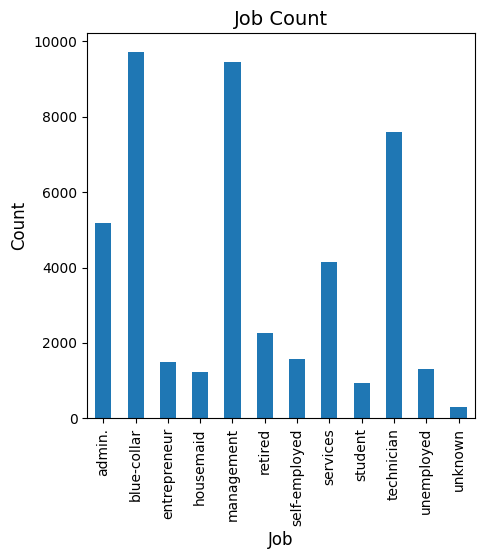

In [ ]:
# Figure: 그림 전체 / Axes: 각각의 도표들
fig, ax = plt.subplots(figsize=(5, 5)) # 그림의 전체(가로, 세로) 크기 지정
job_count.plot(kind='bar', ax=ax)
ax.set_xlabel('Job', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Job Count', fontsize=14)
plt.show()

In [ ]:
s = pd.Series([1,2,3], index=['a', 'b', 'c'])
s

,0
a,1
b,2
c,3


<Axes: >

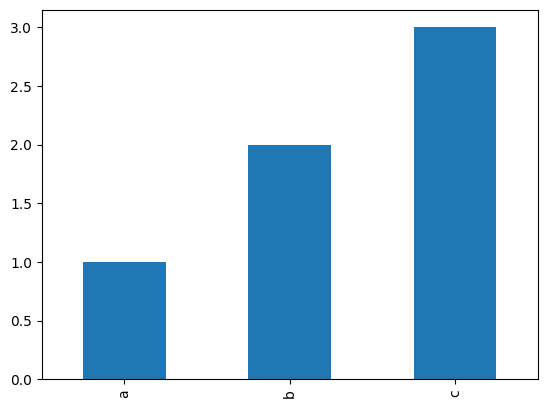

In [ ]:
s.plot(kind='bar')

## 2. histogram
*   연속형(continous) 변수
*   구간별 빈도



In [ ]:
bins = int(bank['age'].max() - bank['age'].min()+1)
bins # 구간의 수

78

<Axes: >

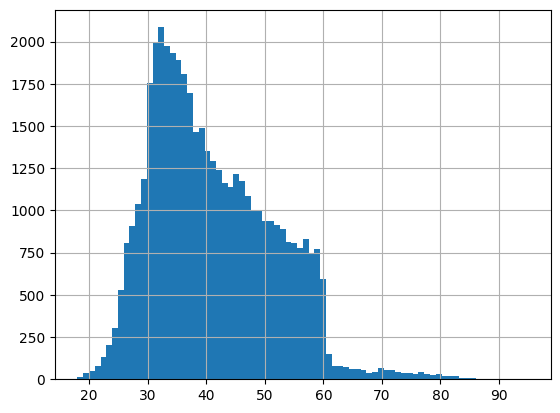

In [ ]:
bank['age'].hist(bins=bins) # 가로: 데이터 구간 / 세로: 빈도

<Axes: >

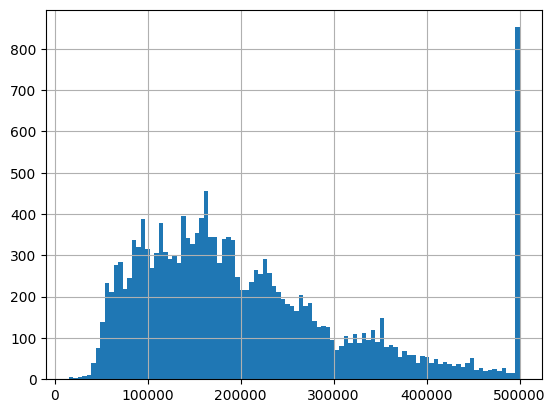

In [ ]:
house['median_house_value'].hist(bins=100)

array([[<Axes: title={'center': 'median_house_value'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'households'}>]], dtype=object)

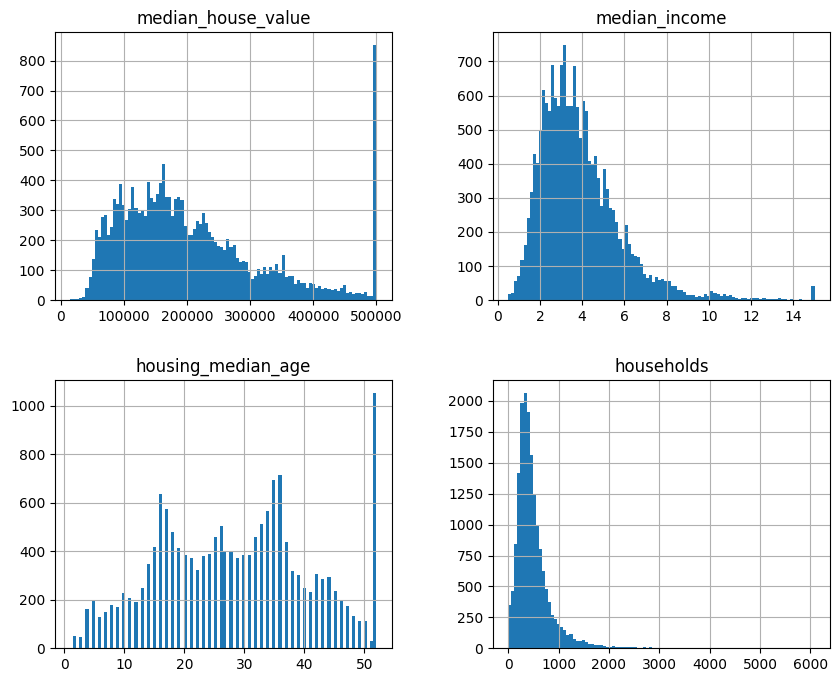

In [ ]:
house[['median_house_value', 'median_income', 'housing_median_age', 'households']].hist(bins=100, figsize=(10, 8))

## 3. 상자 그림

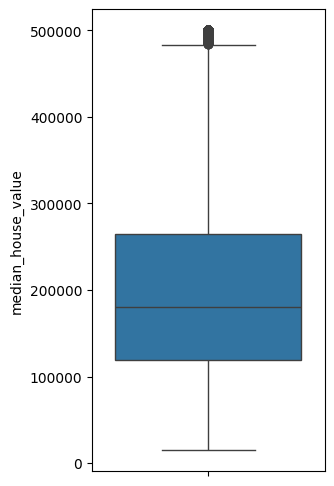

In [ ]:
fig, ax = plt.subplots(figsize=(3, 6))
sns.boxplot(house['median_house_value'], ax=ax) # 최소값, 1사분위수(Q1), 중앙값(median), 3사분위수(Q3), 최대값, 이상치(outlier, 수염 범위 밖)
# 수염 범위: IQR(Interquartile Range, 상자의 높이) X 1.5
plt.show()

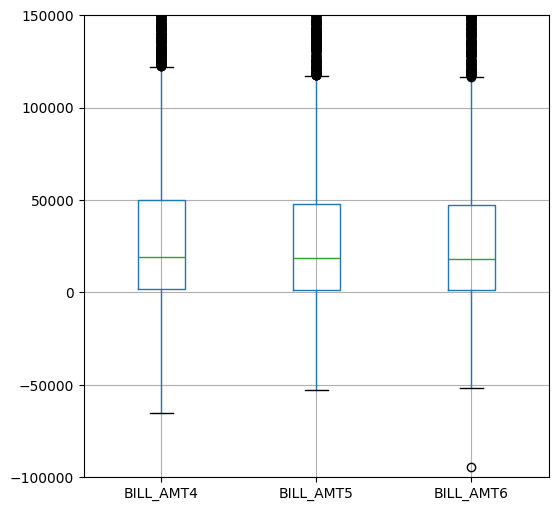

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
default[default['DEFAULT']==1][['BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].boxplot(grid=True, ax=ax)
ax.set_ylim(-100000, 150000) # y축 범위
plt.show()

In [ ]:
# 연체 여부에 따른 잔고 분포 비교
default_y = default[default['DEFAULT']==1] # 연체 O
default_n = default[default['DEFAULT']==0] # 연체 X
default_n.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0


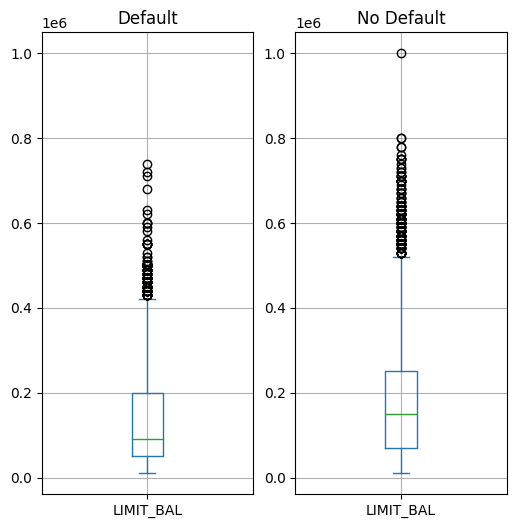

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2,  # 행, 열
                               figsize=(6, 6))

default_y['LIMIT_BAL'].plot.box(grid=True, ax=ax1) # 잔고
default_n['LIMIT_BAL'].plot.box(grid=True, ax=ax2)
# sns.boxplot(default_y['LIMIT_BAL'], ax=ax1)
# sns.boxplot(default_n['LIMIT_BAL'], ax=ax2)

ax1.set_ylim(ax2.get_ylim()) # y축 범위 동일하게

ax1.set_title('Default')
ax2.set_title('No Default')

plt.show()

## 4. 바이올린 그림(violin plot)
* 상자 그림(상자 모서리를 둥글게 표현) + 데이터 밀도 추정



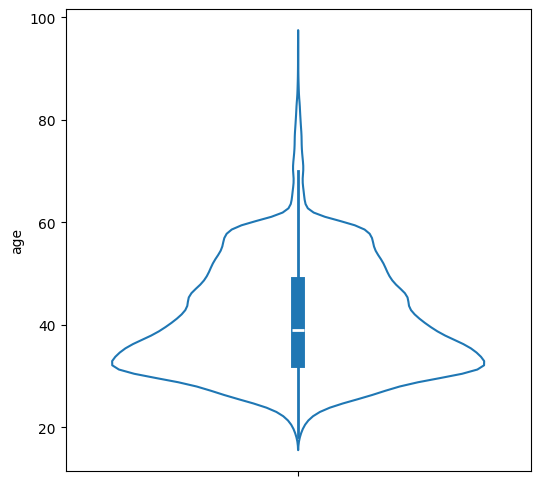

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.violinplot(bank['age'], ax=ax, fill=False,  inner_kws={'box_width': 10,
                                                           'whis_width': 2}) # 수염의 가로폭
plt.show()

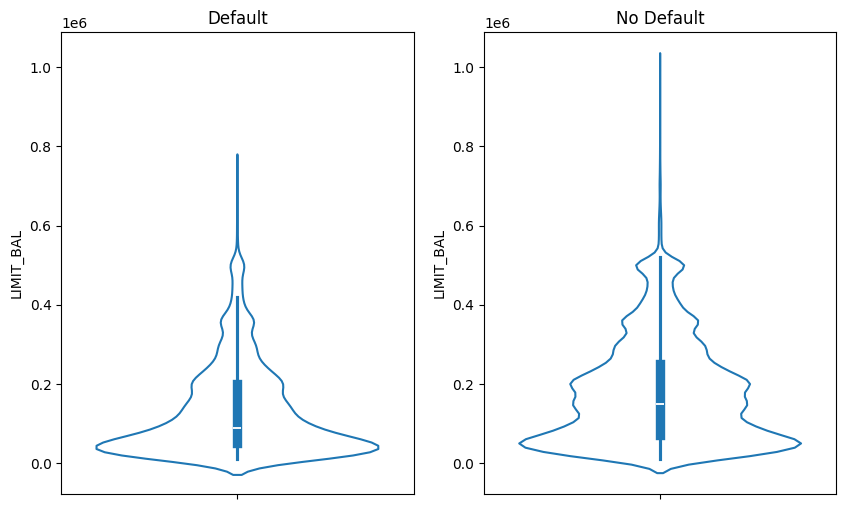

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

sns.violinplot(default_y['LIMIT_BAL'], ax=ax1, fill=False)
sns.violinplot(default_n['LIMIT_BAL'], ax=ax2, fill=False)

ax1.set_ylim(ax2.get_ylim())

ax1.set_title('Default')
ax2.set_title('No Default')

plt.show()

## 5. 산점도(scatterplot)
*   연속형 변수 간 상관 관계



<Axes: xlabel='fixed acidity', ylabel='pH'>

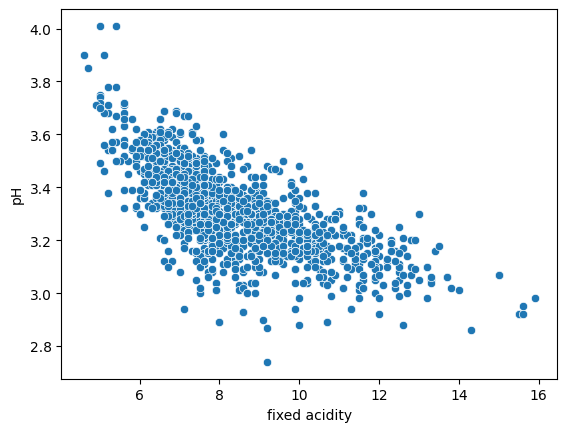

In [ ]:
sns.scatterplot(x=redwine['fixed acidity'], y=redwine['pH']) # 반비례

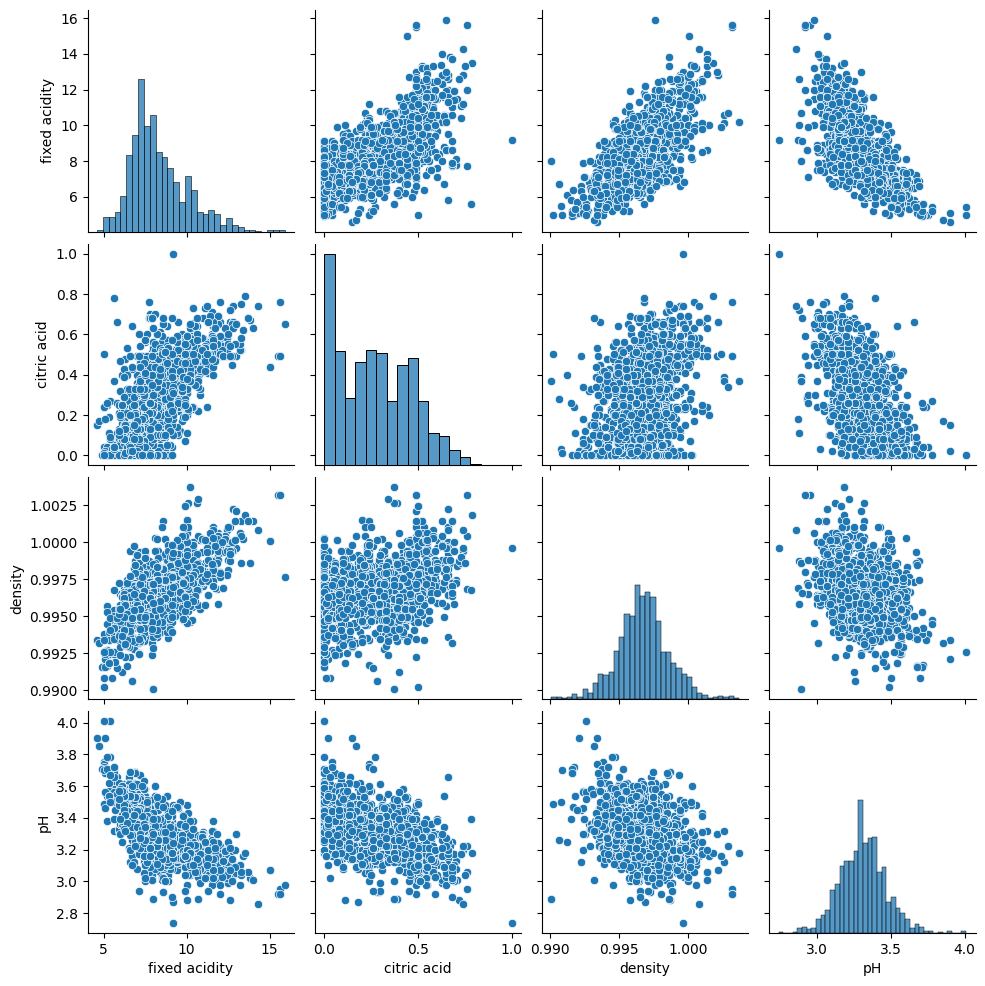

In [ ]:
# 산점도 행렬(scatter plot matrix)
sns.pairplot(redwine[['fixed acidity', 'citric acid', 'density', 'pH']],
             kind='scatter') # 대각선: 히스토그램

## 6. 모자이크 그림
*   범주형 변수 간 상관 관계
*   셀의 넓이 = 범주의 빈도





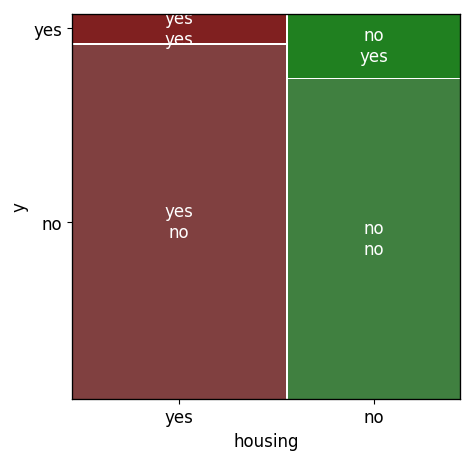

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic

fig, ax = plt.subplots(figsize=(5, 5))
mosaic(bank, ['housing', 'y'], ax=ax)
for text in ax.texts:
    text.set_color('white')
    text.set_fontsize(12)

for label in ax.get_xticklabels()+ax.get_yticklabels():
    label.set_fontsize(12)

ax.set_xlabel('housing', fontsize=12)
ax.set_ylabel('y', fontsize=12)
plt.show()

In [ ]:
ax.get_xticklabels()

[Text(0.2765364084446055, 0, 'yes'), Text(0.7790239706336601, 0, 'no')]

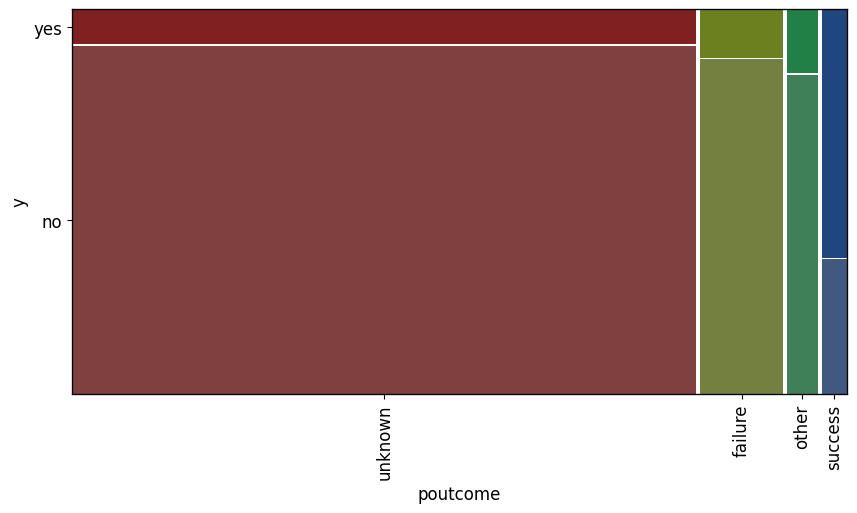

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
mosaic(bank, ['poutcome', 'y'], ax=ax,
       labelizer=lambda x: '', # 셀 내부 텍스트 표시 X
       label_rotation=[90,0]) # x축 레이블을 90도로 회전

for label in ax.get_xticklabels()+ax.get_yticklabels():
    label.set_fontsize(12)

ax.set_xlabel('poutcome', fontsize=12)
ax.set_ylabel('y', fontsize=12)
plt.show()